In [83]:
import pandas as pd
import numpy as np

%matplotlib inline


#Extract
colunas = ['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO', 'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA', 'PREÇO MÉDIO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO']
df_estados = pd.read_csv('../data/br_oil_prices_per_state_2004_2021.tsv', sep='\t', usecols=colunas)
df_estados['PREÇO MÉDIO DISTRIBUIÇÃO'] = df_estados['PREÇO MÉDIO DISTRIBUIÇÃO'].replace('-', '0').astype(float)
df_estados['PREÇO MÉDIO REVENDA'] = df_estados['PREÇO MÉDIO REVENDA'].astype(float)


### Ajustes iniciais

In [101]:
df_estados = df_estados[df_estados['UNIDADE DE MEDIDA']=='R$/l'] #Inicialmente a leitura será realizada somente com combustíveis líquidos
df_estados['PRODUTO'] = df_estados['PRODUTO'].str.replace('ÓLEO DIESEL S10', 'OLEO DIESEL S10')
df_estados['PRODUTO'] = df_estados['PRODUTO'].str.replace('ÓLEO DIESEL', 'OLEO DIESEL')
df_estados['DATA INICIAL'] = df_estados['DATA INICIAL'].astype('datetime64[ns]')


C:\Users\bruno\AppData\Local\Temp/ipykernel_8504/279830917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estados['PRODUTO'] = df_estados['PRODUTO'].str.replace('ÓLEO DIESEL S10', 'OLEO DIESEL S10')
C:\Users\bruno\AppData\Local\Temp/ipykernel_8504/279830917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estados['PRODUTO'] = df_estados['PRODUTO'].str.replace('ÓLEO DIESEL', 'OLEO DIESEL')
C:\Users\bruno\AppData\Local\Temp/ipykernel_8504/279830917.py:4: SettingWithCopyWarning: 
A value is tryin

**Identificação de Outliers**

In [14]:
df_estados.groupby(['ESTADO'])['PRODUTO'].count().reset_index(name='total').sort_values(by='total', ascending=False) 
#Percebe-se que não há outliers na quantidade de medições por estado

,ESTADO,total
14,PARAIBA,3073
24,SAO PAULO,3073
18,RIO DE JANEIRO,3073
4,BAHIA,3073
15,PARANA,3073
7,ESPIRITO SANTO,3073
8,GOIAS,3073
9,MARANHAO,3073
20,RIO GRANDE DO SUL,3073
11,MATO GROSSO DO SUL,3073


### Inicialmente, serão analisadas as cinco regiões sobre o preço de cada combustível
- Centro-Oeste
- Nordeste
- Norte
- Sudeste
- Sul

#### Centro-Oeste

<AxesSubplot:xlabel='DATA INICIAL'>

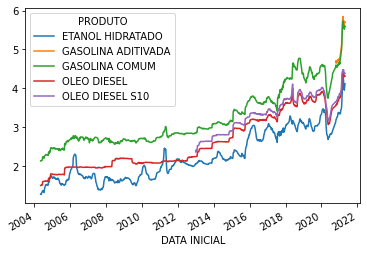

In [51]:
df_centrooeste = df_estados[df_estados['REGIÃO']=='CENTRO OESTE'].drop(columns=['UNIDADE DE MEDIDA', 'NÚMERO DE POSTOS PESQUISADOS'])
df_centrooeste = df_centrooeste.groupby(['PRODUTO', 'DATA INICIAL']).mean()
df_centrooeste.squeeze().unstack(level=0).plot()

#### Nordeste

<AxesSubplot:xlabel='DATA INICIAL'>

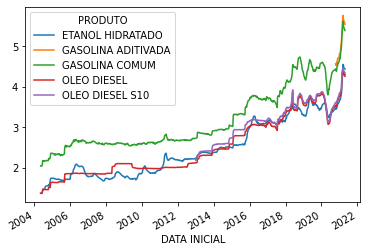

In [52]:
df_nordeste = df_estados[df_estados['REGIÃO']=='NORDESTE'].drop(columns=['UNIDADE DE MEDIDA', 'NÚMERO DE POSTOS PESQUISADOS'])
df_nordeste = df_nordeste.groupby(['PRODUTO', 'DATA INICIAL']).mean()
df_nordeste.squeeze().unstack(level=0).plot()

#### Norte

<AxesSubplot:xlabel='DATA INICIAL'>

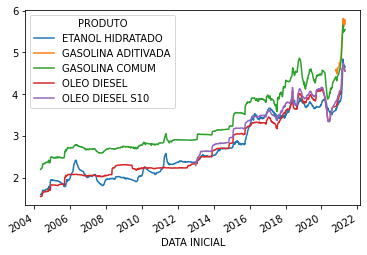

In [54]:
df_norte = df_estados[df_estados['REGIÃO']=='NORTE'].drop(columns=['UNIDADE DE MEDIDA', 'NÚMERO DE POSTOS PESQUISADOS'])
df_norte = df_norte.groupby(['PRODUTO', 'DATA INICIAL']).mean()
df_norte.squeeze().unstack(level=0).plot()

#### Sudeste

<AxesSubplot:xlabel='DATA INICIAL'>

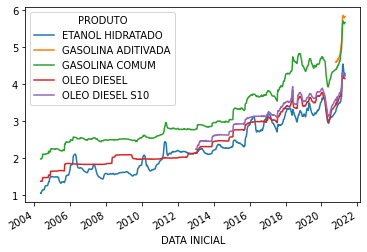

In [57]:
df_sudeste = df_estados[df_estados['REGIÃO']=='SUDESTE'].drop(columns=['UNIDADE DE MEDIDA', 'NÚMERO DE POSTOS PESQUISADOS'])
df_sudeste = df_sudeste.groupby(['PRODUTO', 'DATA INICIAL']).mean()
df_sudeste.squeeze().unstack(level=0).plot()

#### Sul

<AxesSubplot:xlabel='DATA INICIAL'>

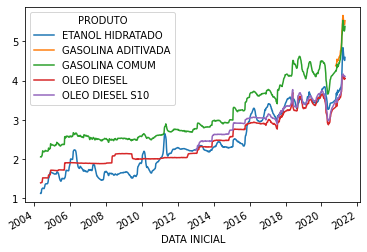

In [58]:
df_sul = df_estados[df_estados['REGIÃO']=='SUL'].drop(columns=['UNIDADE DE MEDIDA', 'NÚMERO DE POSTOS PESQUISADOS'])
df_sul = df_sul.groupby(['PRODUTO', 'DATA INICIAL']).mean()
df_sul.squeeze().unstack(level=0).plot()

### Agora, serão analisadas as diferenças entre os preços médios de distribuição e revenda para as cinco regiões

#### Ajustes iniciais

In [108]:
#Dropando todos os outliers e valores onde não houve a medição do preço médio distribuição
df_estados.drop(df_estados[df_estados['PREÇO MÉDIO DISTRIBUIÇÃO']<=0].index, inplace=True) 

#Criando a variável da diferença
df_estados['DELTA'] = df_estados['PREÇO MÉDIO REVENDA'] - df_estados['PREÇO MÉDIO DISTRIBUIÇÃO']
df_estados

C:\Users\bruno\AppData\Local\Temp/ipykernel_8504/4220864205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estados.drop(df_estados[df_estados['PREÇO MÉDIO DISTRIBUIÇÃO']<=0].index, inplace=True)
C:\Users\bruno\AppData\Local\Temp/ipykernel_8504/4220864205.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estados['DELTA'] = df_estados['PREÇO MÉDIO REVENDA'] - df_estados['PREÇO MÉDIO DISTRIBUIÇÃO']


,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DELTA
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.825,0.463
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.763,0.399
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.970,0.419
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.830,0.432
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.941,0.240
...,...,...,...,...,...,...,...,...,...,...
115879,2020-08-16,2020-08-22,NORTE,RORAIMA,OLEO DIESEL S10,13,R$/l,3.459,3.109,0.350
115880,2020-08-16,2020-08-22,SUL,SANTA CATARINA,OLEO DIESEL S10,236,R$/l,3.395,2.947,0.448
115881,2020-08-16,2020-08-22,SUDESTE,SAO PAULO,OLEO DIESEL S10,1267,R$/l,3.386,2.973,0.413
115882,2020-08-16,2020-08-22,NORDESTE,SERGIPE,OLEO DIESEL S10,39,R$/l,3.559,3.046,0.513


### Separando por regiões
### Centro-Oeste

<AxesSubplot:xlabel='DATA INICIAL'>

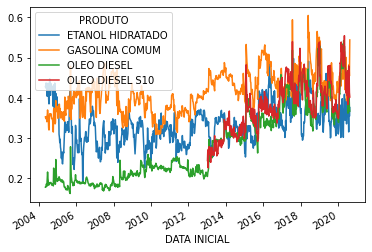

In [103]:
df_centrooeste = df_estados[df_estados['REGIÃO']=='CENTRO OESTE'].drop(columns=['UNIDADE DE MEDIDA', 'NÚMERO DE POSTOS PESQUISADOS', 'PREÇO MÉDIO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO'])
df_centrooeste = df_centrooeste.groupby(['PRODUTO', 'DATA INICIAL']).mean()
df_centrooeste.squeeze().unstack(level=0).plot()

### Nordeste

<AxesSubplot:xlabel='DATA INICIAL'>

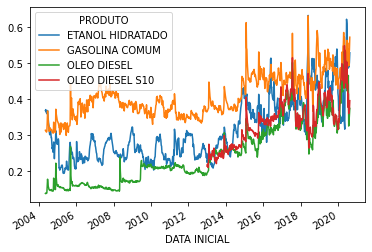

In [104]:
df_nordeste = df_estados[df_estados['REGIÃO']=='NORDESTE'].drop(columns=['UNIDADE DE MEDIDA', 'NÚMERO DE POSTOS PESQUISADOS', 'PREÇO MÉDIO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO'])
df_nordeste = df_nordeste.groupby(['PRODUTO', 'DATA INICIAL']).mean()
df_nordeste.squeeze().unstack(level=0).plot()

### Norte

<AxesSubplot:xlabel='DATA INICIAL'>

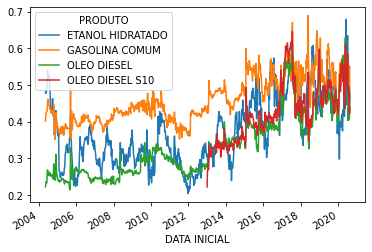

In [105]:
df_norte = df_estados[df_estados['REGIÃO']=='NORTE'].drop(columns=['UNIDADE DE MEDIDA', 'NÚMERO DE POSTOS PESQUISADOS', 'PREÇO MÉDIO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO'])
df_norte = df_norte.groupby(['PRODUTO', 'DATA INICIAL']).mean()
df_norte.squeeze().unstack(level=0).plot()

### Sudeste

<AxesSubplot:xlabel='DATA INICIAL'>

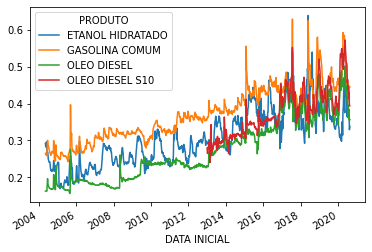

In [106]:
df_sudeste = df_estados[df_estados['REGIÃO']=='SUDESTE'].drop(columns=['UNIDADE DE MEDIDA', 'NÚMERO DE POSTOS PESQUISADOS', 'PREÇO MÉDIO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO'])
df_sudeste = df_sudeste.groupby(['PRODUTO', 'DATA INICIAL']).mean()
df_sudeste.squeeze().unstack(level=0).plot()

### Sul

<AxesSubplot:xlabel='DATA INICIAL'>

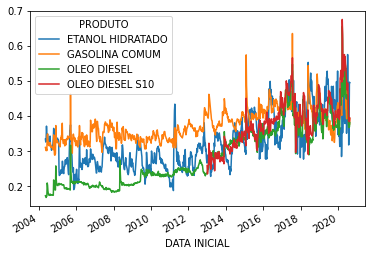

In [107]:
df_sul = df_estados[df_estados['REGIÃO']=='SUL'].drop(columns=['UNIDADE DE MEDIDA', 'NÚMERO DE POSTOS PESQUISADOS', 'PREÇO MÉDIO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO'])
df_sul = df_sul.groupby(['PRODUTO', 'DATA INICIAL']).mean()
df_sul.squeeze().unstack(level=0).plot()

## Analisando, por região, a diferença entre 2004 e 2021
#### Como só há dados do etanol hidratado, da gasolina comum e do óleo diesel desde 2004, somente essas três variáveis serão consideradas

In [180]:
df_estados2 = df_estados.drop(columns=['NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA', 'PREÇO MÉDIO DISTRIBUIÇÃO', 'DELTA', 'ESTADO'])
df_estados2 = df_estados2[df_estados['PRODUTO'].isin(['ETANOL HIDRATADO','GASOLINA COMUM', 'OLEO DIESEL'])]
df_estados2 = df_estados2.groupby(['REGIÃO', 'PRODUTO', 'DATA INICIAL', 'DATA FINAL']).mean().reset_index()

### Centro-Oeste

In [198]:
from datetime import datetime

df_centrooeste = df_estados2[df_estados2['REGIÃO']=='CENTRO OESTE']
df_inicio = df_centrooeste[df_centrooeste['DATA INICIAL']==df_centrooeste['DATA INICIAL'].min()].rename(columns={'PREÇO MÉDIO REVENDA':'PREÇO INICIAL'}).drop(columns=['DATA INICIAL', 'DATA FINAL'])
df_final = df_centrooeste[df_centrooeste['DATA FINAL']==df_centrooeste['DATA FINAL'].max()].rename(columns={'PREÇO MÉDIO REVENDA':'PREÇO FINAL'}).drop(columns=['DATA INICIAL', 'DATA FINAL'])
df_centrooeste = pd.merge(df_inicio, df_final, how='left')
df_centrooeste['DELTA'] = df_centrooeste['PREÇO FINAL'] - df_centrooeste['PREÇO INICIAL']
df_centrooeste

,REGIÃO,PRODUTO,PREÇO INICIAL,PREÇO FINAL,DELTA
0,CENTRO OESTE,ETANOL HIDRATADO,1.27525,2.91200,1.63675
1,CENTRO OESTE,GASOLINA COMUM,2.13300,4.38300,2.25000
2,CENTRO OESTE,OLEO DIESEL,1.50250,3.47825,1.97575


### Nordeste

In [199]:
df_nordeste = df_estados2[df_estados2['REGIÃO']=='NORDESTE']
df_inicio = df_nordeste[df_nordeste['DATA INICIAL']==df_nordeste['DATA INICIAL'].min()].rename(columns={'PREÇO MÉDIO REVENDA':'PREÇO INICIAL'}).drop(columns=['DATA INICIAL', 'DATA FINAL'])
df_final = df_nordeste[df_nordeste['DATA FINAL']==df_nordeste['DATA FINAL'].max()].rename(columns={'PREÇO MÉDIO REVENDA':'PREÇO FINAL'}).drop(columns=['DATA INICIAL', 'DATA FINAL'])
df_nordeste = pd.merge(df_inicio, df_final, how='left')
df_nordeste['DELTA'] = df_nordeste['PREÇO FINAL'] - df_nordeste['PREÇO INICIAL']
df_nordeste

,REGIÃO,PRODUTO,PREÇO INICIAL,PREÇO FINAL,DELTA
0,NORDESTE,ETANOL HIDRATADO,1.367333,3.401333,2.034000
1,NORDESTE,GASOLINA COMUM,2.045667,4.368625,2.322958
2,NORDESTE,OLEO DIESEL,1.367778,3.421857,2.054079


### Norte

In [200]:
df_norte = df_estados2[df_estados2['REGIÃO']=='NORTE']
df_inicio = df_norte[df_norte['DATA INICIAL']==df_norte['DATA INICIAL'].min()].rename(columns={'PREÇO MÉDIO REVENDA':'PREÇO INICIAL'}).drop(columns=['DATA INICIAL', 'DATA FINAL'])
df_final = df_norte[df_norte['DATA FINAL']==df_norte['DATA FINAL'].max()].rename(columns={'PREÇO MÉDIO REVENDA':'PREÇO FINAL'}).drop(columns=['DATA INICIAL', 'DATA FINAL'])
df_norte = pd.merge(df_inicio, df_final, how='left')
df_norte['DELTA'] = df_norte['PREÇO FINAL'] - df_norte['PREÇO INICIAL']
df_norte

,REGIÃO,PRODUTO,PREÇO INICIAL,PREÇO FINAL,DELTA
0,NORTE,ETANOL HIDRATADO,1.593286,3.546500,1.953214
1,NORTE,GASOLINA COMUM,2.194143,4.387667,2.193524
2,NORTE,OLEO DIESEL,1.545429,3.699333,2.153905


### Sudeste

In [201]:
df_sudeste = df_estados2[df_estados2['REGIÃO']=='SUDESTE']
df_inicio = df_sudeste[df_sudeste['DATA INICIAL']==df_sudeste['DATA INICIAL'].min()].rename(columns={'PREÇO MÉDIO REVENDA':'PREÇO INICIAL'}).drop(columns=['DATA INICIAL', 'DATA FINAL'])
df_final = df_sudeste[df_sudeste['DATA FINAL']==df_sudeste['DATA FINAL'].max()].rename(columns={'PREÇO MÉDIO REVENDA':'PREÇO FINAL'}).drop(columns=['DATA INICIAL', 'DATA FINAL'])
df_sudeste = pd.merge(df_inicio, df_final, how='left')
df_sudeste['DELTA'] = df_sudeste['PREÇO FINAL'] - df_sudeste['PREÇO INICIAL']
df_sudeste

,REGIÃO,PRODUTO,PREÇO INICIAL,PREÇO FINAL,DELTA
0,SUDESTE,ETANOL HIDRATADO,1.05475,3.1370,2.08225
1,SUDESTE,GASOLINA COMUM,1.98575,4.3315,2.34575
2,SUDESTE,OLEO DIESEL,1.38050,3.3310,1.95050


### Sul

In [202]:
df_sul = df_estados2[df_estados2['REGIÃO']=='SUL']
df_inicio = df_sul[df_sul['DATA INICIAL']==df_sul['DATA INICIAL'].min()].rename(columns={'PREÇO MÉDIO REVENDA':'PREÇO INICIAL'}).drop(columns=['DATA INICIAL', 'DATA FINAL'])
df_final = df_sul[df_sul['DATA FINAL']==df_sul['DATA FINAL'].max()].rename(columns={'PREÇO MÉDIO REVENDA':'PREÇO FINAL'}).drop(columns=['DATA INICIAL', 'DATA FINAL'])
df_sul = pd.merge(df_inicio, df_final, how='left')
df_sul['DELTA'] = df_sul['PREÇO FINAL'] - df_sul['PREÇO INICIAL']
df_sul

,REGIÃO,PRODUTO,PREÇO INICIAL,PREÇO FINAL,DELTA
0,SUL,ETANOL HIDRATADO,1.125,3.439667,2.314667
1,SUL,GASOLINA COMUM,2.057,4.145333,2.088333
2,SUL,OLEO DIESEL,1.394,3.262667,1.868667
